# Worksheet 3

**Motive:** This worksheet aim to introduce the central concepts of machine learning, and how they can be applied in Python using the Scikit-learn Package.

- Definition of machine learning
- Data representation in scikit-learn
- Introduction to the Scikit-learn API

## Importing Packages

__NOTE:__ For loading the packages into the current Python Jupyter notebook, use `import PACKAGE_NAME` command.  In case it throws an error i.e. `ModuleNotFoundError: No module named 'PACKAGE_NAME'`, then use `!pip install PACKAGE_NAME` in the code chunk to install the same. 

In [1]:
%matplotlib inline
%autosave 60
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
plt.rcParams['figure.figsize'] = (8, 5) #Note that we configure a custom default figure size.
#Virtually every default aspect of matplotlib can be customized (https://matplotlib.org/users/customizing.html).

Autosaving every 60 seconds


## About Scikit-Learn

This session will cover the basics of Scikit-Learn, a popular package containing a collection of tools for machine learning written in Python. See more at http://scikit-learn.org. Scikit-learn (or sklearn for short) is a free open-source machine learning library for Python. It is designed to cooperate with SciPy and NumPy libraries and simplifies data science techniques in Python with built-in support for popular classification, regression, and clustering machine learning algorithms.

Sklearn serves as a unifying point for many ML tools to work seamlessly together. It also gives data scientists a one-stop-shop toolkit to import, preprocess, plot, and predict data.

## Representation of Data in Scikit-learn

Machine learning is about creating models from data: for that reason, we'll start by
discussing how data can be represented in order to be understood by the computer. 

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])

(150, 4)
[5.1 3.5 1.4 0.2]


In [5]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [6]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot:

/var/folders/yg/330yvp5s2zq2t2_qr51v5wp40000gq/T/ipykernel_82648/3089593218.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))


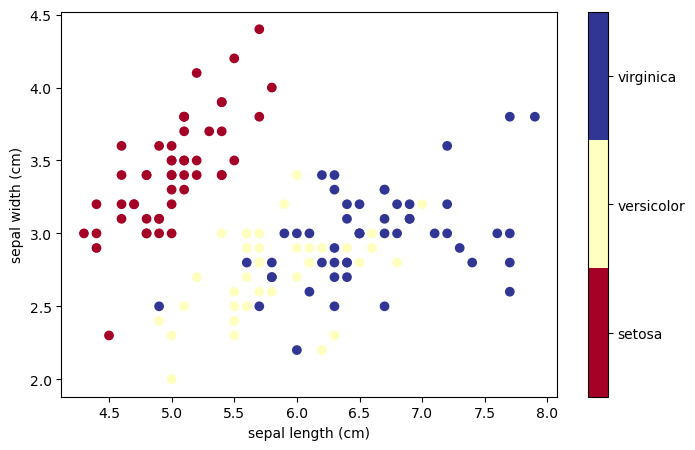

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

### Quick Exercise:

**Change** `x_index` **and** `y_index` **in the above script
and find a combination of two parameters
which maximally separate the three classes.**

This exercise is a preview of **dimensionality reduction**, which we'll see later.

## Other Available Data
They come in three flavors:

- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``
- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

You can explore the available dataset loaders, fetchers, and generators using IPython's
tab-completion functionality.  After importing the ``datasets`` submodule from ``sklearn``,
type

    datasets.load_ + TAB

or

    datasets.fetch_ + TAB

or

    datasets.make_ + TAB

to see a list of available functions.

In [9]:
from sklearn import datasets

In [10]:
# Type datasets.fetch_<TAB> or datasets.load_<TAB> in IPython to see all possibilities

# datasets.fetch_

In [11]:
# datasets.load_

## The Scikit-learn Estimator Object

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. For instance a linear regression is implemented as so:

In [12]:
from sklearn.linear_model import LinearRegression

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

In [13]:
model = LinearRegression(positive=True)
print(model)

LinearRegression(positive=True)


In [14]:
print(model)

LinearRegression(positive=True)


**Estimated Model parameters**: When data is *fit* with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

In [15]:
x = np.arange(10)
y = 2 * x + 1

In [16]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


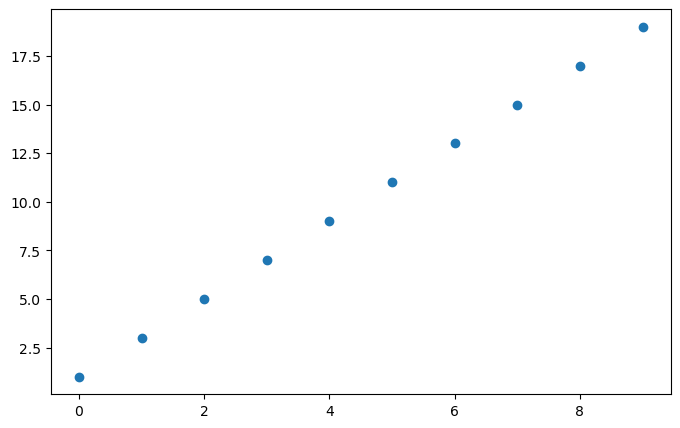

In [17]:
plt.plot(x, y, 'o');

In [18]:
# The input data for sklearn is 2D: (samples == 10 x features == 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


In [19]:
# fit the model on our data
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,True


In [20]:
# underscore at the end indicates a fit parameter
print(model.coef_)
print(model.intercept_)

[2.]
1.0000000000000018


The model found a line with a slope 2 and intercept 1, as we'd expect.

### Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods,
and we'll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.predict()` : predict labels in clustering algorithms.
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

## General Steps for developing a statistical model

1. Data Collection

    - The quantity & quality of your data dictates how accurate the model is. One can have primary data or can use secondary data for model training and testing. 
    
1. Data Preparation
    -  Creating technical data from raw data and then consistent data for statistical analysis. 
    - Cleaning may be required (remove duplicates, correct errors, deal with missing values, normalization, data type conversions, etc.).
    - Visual inspection of the data and identify the relationship between the features. Checking for class imbalance and other exploratory analysis. 
    - Choosing the correct methodology of training and testing the models. Splitting the data into Train and Test data sets.  
    
1.  Choose a Model
     - Choose the model classes based on the dependent variable type. For instance, if the dependent variable is quantitative then regression models can be selected. Different algorithms are used for different tasks; choose the right one.
 
1.  Train the Model

    - The goal of training is to answer a question or make a prediction correctly as often as possible.
 
1.  Evaluate the Model

    - Based on the metrics or combination of metrics, objective performance of the model is measured. 
    - Test the model against previously unseen data.
    - This unseen data is meant to be somewhat representative of model performance in the real world, but still helps to tune the model (as opposed to testing data, which does not).
    
1. Parameter Tuning

    - Some models do have hyper-parameters, those need to be tuned for improving the performance. 

1. Make Predictions

    - Using test data, make predictions to see the model performance. 

__Note: It may be needed to go back from the last step to the first step, if the model is not performing the way it was expected.__

### Exploratory Data Analysis 

Let's move to regression model building, but before that, it would be a good idea to look at data and do some exploratory data analysis of the dataset. For regression modeling, we would be using `boston` dataset 

<div class="alert alert-success">
Below you are given an array of Median values of owner-occupied homes in $1000's from a boston dataset. This dataframe contains the following columns:

    - `crim` per capita crime rate by town.
    - `zn` proportion of residential land zoned for lots over 25,000 sq.ft.
    - `indus` proportion of non-retail business acres per town.
    - `chas` Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
    - `nox` nitrogen oxides concentration (parts per 10 million).
    - `rm` average number of rooms per dwelling.
    - `age` proportion of owner-occupied units built prior to 1940.
    - `dis` weighted mean of distances to five Boston employment centres.
    - `rad` index of accessibility to radial highways.
    - `tax` full-value property-tax rate per \$10,000.
    - `ptratio` pupil-teacher ratio by town.
    - `lstat` lower status of the population (percent).
    - `medv` median value of owner-occupied homes in \$1000s.

In this section, you will try to find the best statistic $\theta$ to represent the median value of owner-occupied homes given in the array. The procedure includes constructing the mean squared error (MSE) for the `medv` data and finding the value that minimizes the MSE. 

<div>

### Question

<div class="alert alert-success">

a) How many rows and columns are in the `boston` data set? What do the rows and columns represent?

b) Create pairwise scatterplots of the predictors (columns) in this data set. Are any of the predictors associated with median value of owner-occupied homes? If so, explain the relationship.

c) Do any of the suburbs of Boston appear to have particularly high median value of owner-occupied homes? Tax rates? Pupil-teacher ratios? 

d) How many of the suburbs in this data set bound the Charles river? and What is the median pupil-teacher ratio among the towns in this data set?

e) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

<div>

In [48]:
from ISLP import load_data
boston = load_data('Boston')
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [49]:
# Part a)
boston.shape # SOLUTION
boston.columns # SOLUTION

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

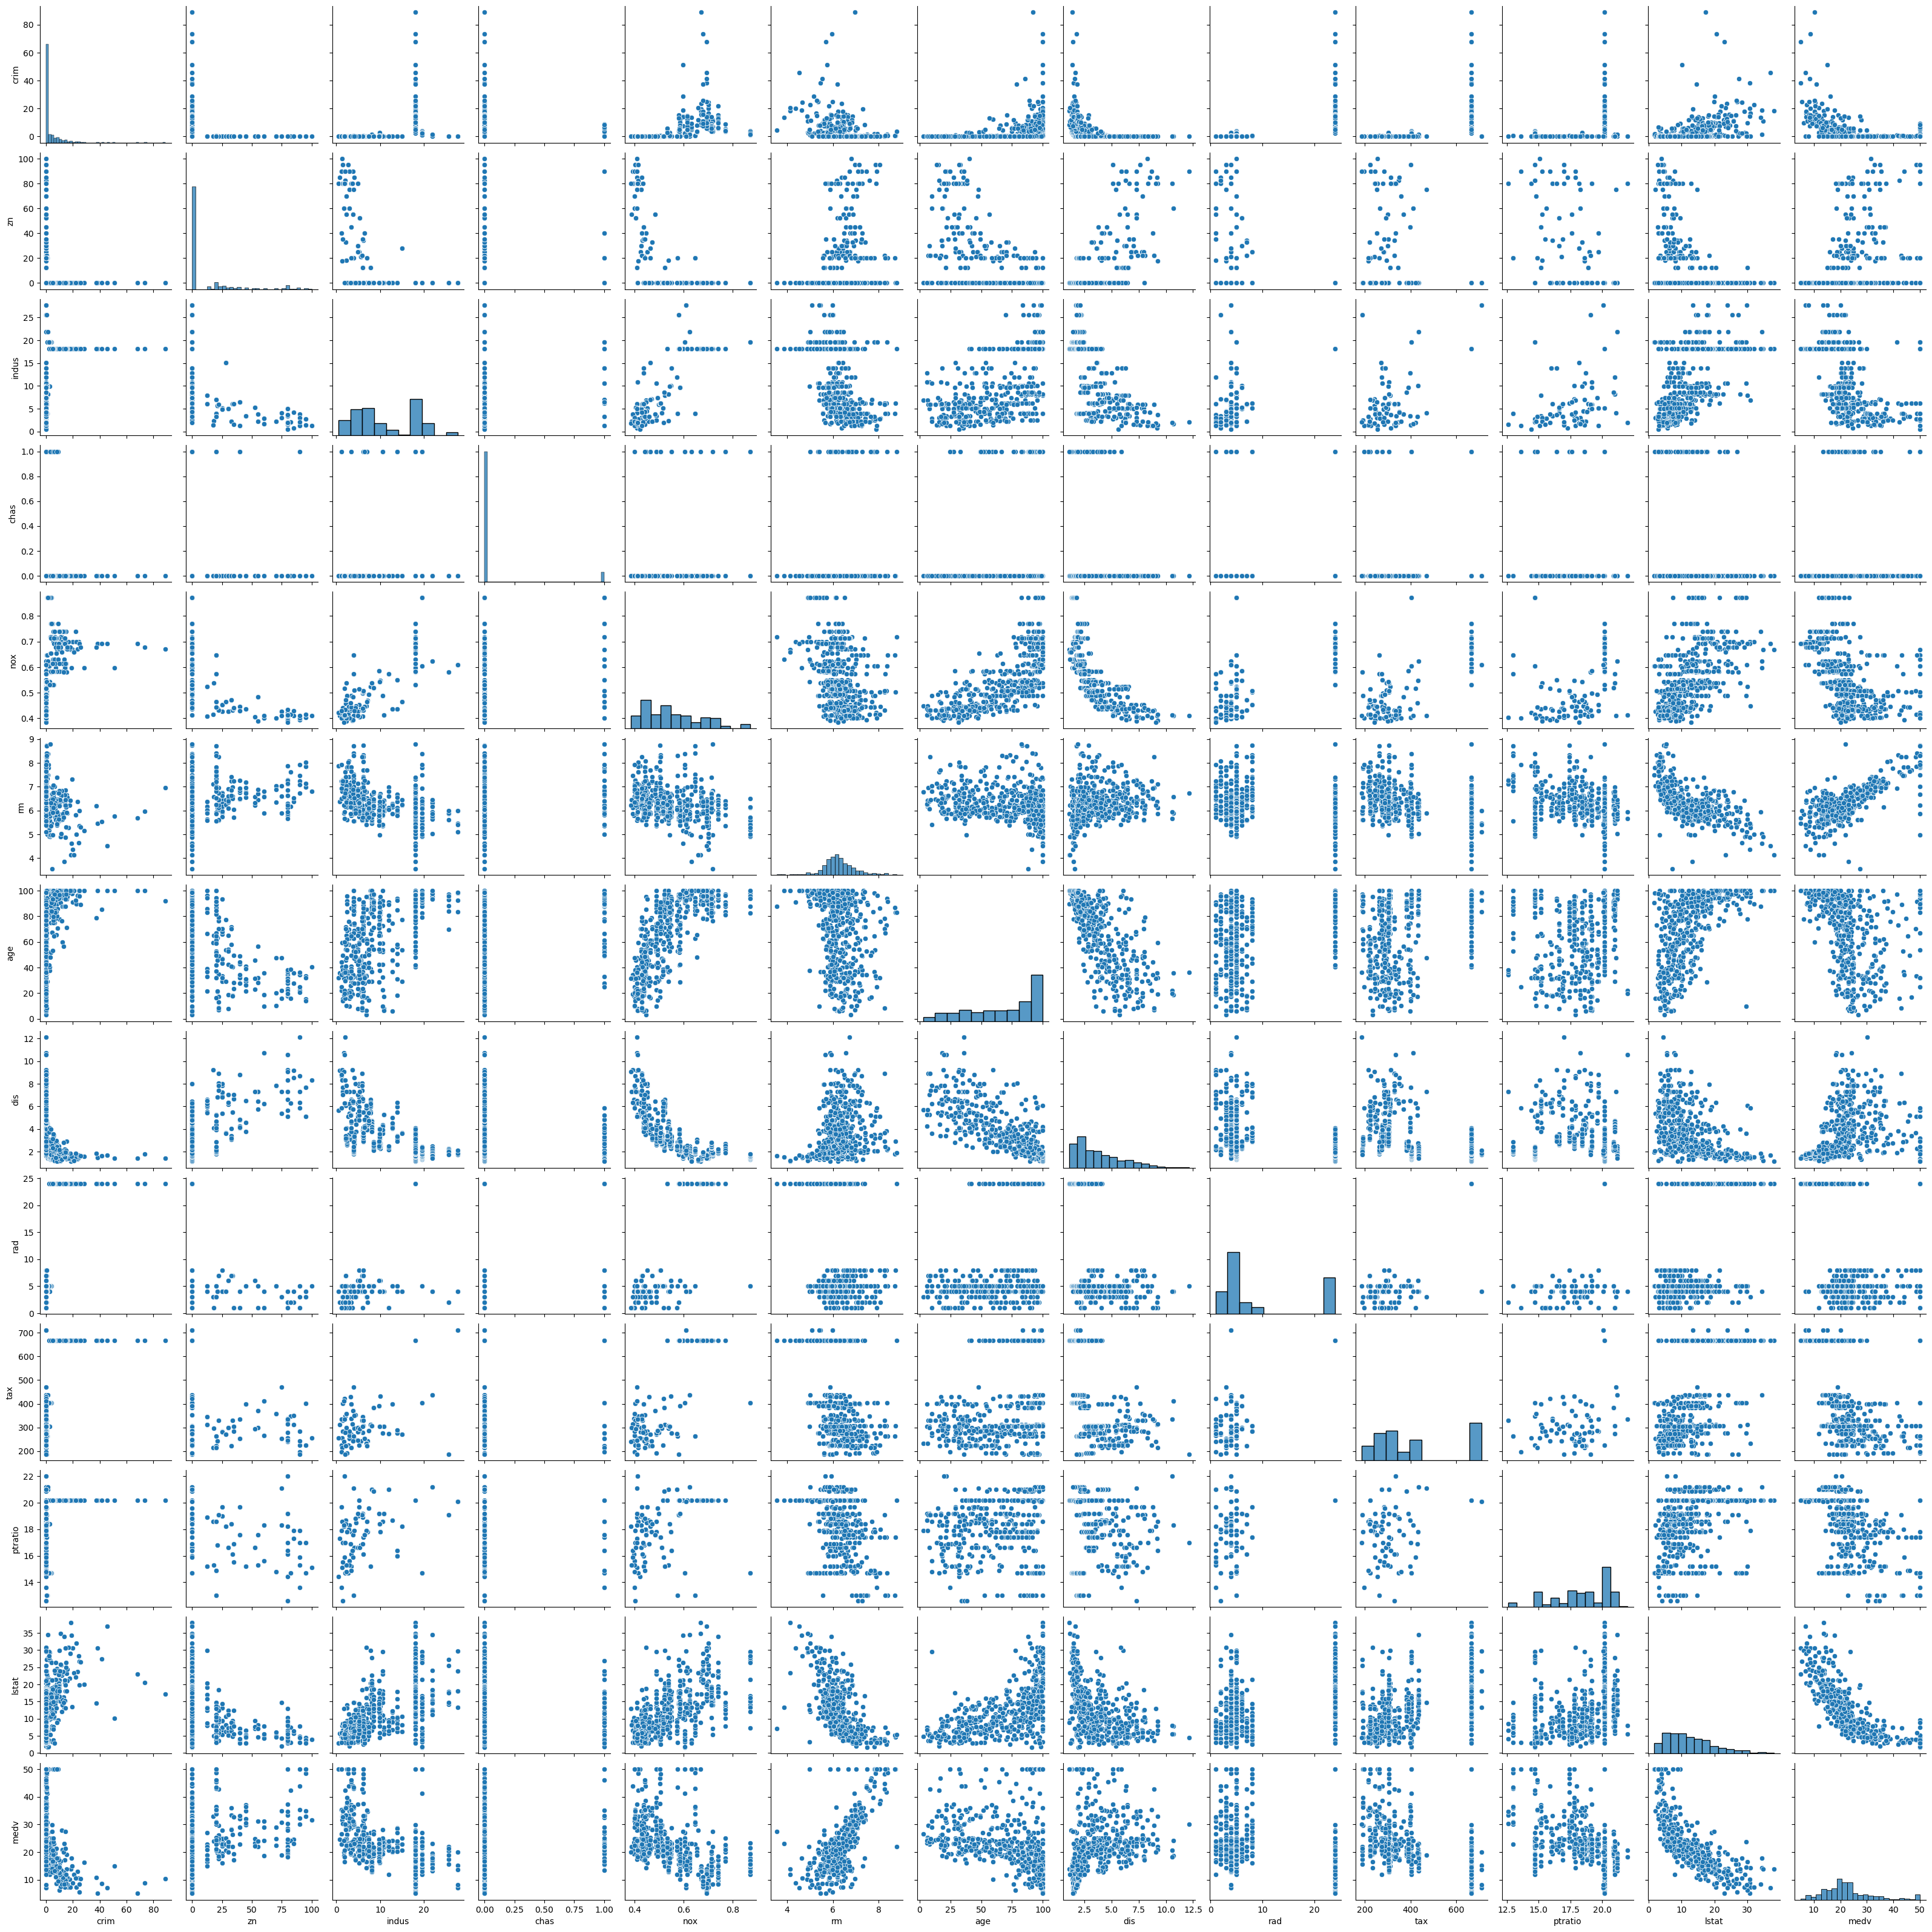

In [50]:
# Part b)
# BEGIN SOLUTION
sns.pairplot(boston) 
#`lstat` and `rm` seem strongly associated with `medv`
# END SOLUTION

             medv         tax     ptratio
count  506.000000  506.000000  506.000000
mean    22.532806  408.237154   18.455534
std      9.197104  168.537116    2.164946
min      5.000000  187.000000   12.600000
25%     17.025000  279.000000   17.400000
50%     21.200000  330.000000   19.050000
75%     25.000000  666.000000   20.200000
max     50.000000  711.000000   22.000000
Number of high median value of owner-occupied homes: 31
Number of high tax rates: 5
Number of high Pupil-teacher ratios: 18


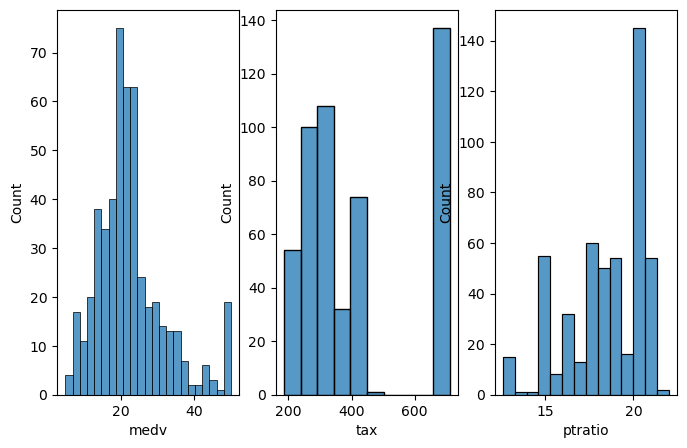

In [51]:
# Part c)

# add 1x3 matplotlib grid and plot 3 seaborn distplot
f, axes = plt.subplots(1, 3)

# BEGIN SOLUTION
sns.histplot(boston['medv'],  ax=axes[0])
sns.histplot(boston['tax'], ax=axes[1])
sns.histplot(boston['ptratio'], ax=axes[2]);
print(boston[['medv', 'tax', 'ptratio']].describe())
# Based on the above results, lets look at the high values
print("Number of high median value of owner-occupied homes: {}".format(boston[boston['medv'] > 40]["medv"].count()))
print("Number of high tax rates: {}".format(boston[boston['tax'] > 700]["tax"].count()))
print("Number of high Pupil-teacher ratios: {}".format(boston[boston['ptratio'] > 21]["ptratio"].count()))
# END SOLUTION

In [52]:
# Part d)

boston['chas'].value_counts() # SOLUTION

boston['ptratio'].median()  # SOLUTION

np.float64(19.05)

In [53]:
# Part e)

boston[boston['rm'] > 7] # SOLUTION

boston[boston['rm'] > 8] # SOLUTION

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,4.21,38.7
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,3.32,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,2.88,50.0
224,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,4.14,44.8
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,4.63,50.0
226,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,3.13,37.6
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,2.47,41.7
233,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,3.95,48.3
253,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,3.54,42.8
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,5.12,50.0


## Simple Linear Regression

We fit above a **constant** model to this dataset, meaning our model was $\hat{y} = \theta$. In other words, given the boston dataset, we tried to find a summary statistic $\theta$ that best represented our set of the median value of owner-occupied homes. To find the value of $\theta$, we minimized the following empirical risk:

$$R(\theta) = \frac{1}{n}\sum_{i = 1}^n L(y_i, \theta)$$

Here, $\mathcal{D} = \{y_1, y_2, ..., y_n \}$ refers to our set of `medv` values.

We looked at two different loss functions:

- $L_2$: $L_2(y_i, \hat{y_i}) = (y_i - \hat{y_i})^2$

- $L_1$: $L_1(y_i, \hat{y_i}) = \left| y_i - \hat{y_i} \right|$


<br>

We have seen above in question 7 that `lstat` and `rm` seem strongly associated with `medv` from boston dataset.  Specifically, we're interested in the relationship between the ` lower status of the population (percent)` (lstat) column and `medv` column. Our goal will be to predict medv ($y$) from lstat ($x$), i.e., we want to find values of $a$ and $b$ so that given $x$, predict $y$ as
$$\boxed{\hat{y} = a + bx}$$
We will now explore different ways to obtain the optimal values of $a, b$, called $\hat{a}, \hat{b}$, where $\hat{y} = \hat{a} + \hat{b}x$. 

In real world data science work, you are far more likely to use something similar to the `seaborn` and `scikit-learn` approaches.

First, let's run `sns.lmplot`, which will both provide a scatterplot of `medv` vs `lstat` and also display the least-squares line of best fit. This line of best fit that we would look to determine empirically.

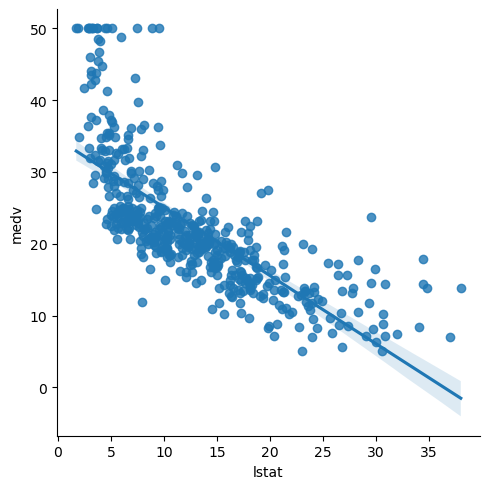

In [54]:
sns.lmplot(data = boston, x = "lstat", y = "medv")

Here, we are going to use the package scikit-learn. It is a widely used Python library for machine learning, built on top of NumPy and some other packages. It provides the means for preprocessing data, reducing dimensionality, implementing regression, classification, clustering, and more. Like NumPy, scikit-learn is also open source.

To fit the linear regression mode, we first create a `LinearRegression` object.

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Here, `model` is the estimator of LinearRegression. You can provide several optional parameters to LinearRegression:

- `fit_intercept` is a Boolean (True by default) that decides whether to calculate the intercept (True) or consider it equal to zero (False).
- `copy_X` is a Boolean (True by default) that decides whether to copy (True) or overwrite the input variables (False).
- `n_jobs` is an integer or None (default) and represents the number of jobs used in parallel computation. None usually means one job and -1 to use all processors.

For simple regression model fitting, we are using the default values of all parameters. Therefore, the `model` is like a "blank slate" for a linear model. 

Now, we need to tell `model` to "fit" itself to the data. The .fit() method, calculates the optimal values of the weights $\hat a$ and $\hat b$ values, using the existing input and output (X and y) as the arguments. In other words, .fit() fits the model. It returns self, which is the variable model itself. 

<i>Note: `X` needs to be a matrix (or DataFrame), as opposed to a single array (or Series). This is because `sklearn.linear_model` is robust enough to be used for multiple regression.</i>

In [56]:
model.fit(X = boston[['lstat']], y= boston['medv'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Now that the model exists, we can look at the $\hat a$ and $\hat b$ values it found, by attributes`intercept_` and `coef_`, respectively. Here,

 - coef_: It is used to return the coefficients for the linear regression problem.
 - Intercept_: Intercept is an independent term in this linear model.

In [57]:
model.coef_

array([-0.95004935])

In [58]:
model.intercept_

np.float64(34.55384087938312)

Once you have your model fitted, you can get the results to check whether the model works satisfactorily and interpret it.

You can obtain the coefficient of determination (𝑅²) with `.score(X,y)` called on model:

In [59]:
Rsq = model.score(X = boston[['lstat']], y= boston['medv'])

Rsq

0.5441462975864797

Once there is a satisfactory model, you can use it for predictions with either existing or new data.

To use the `scikit-learn` linear regression model to make predictions, you can use the `model.predict()` method:

In [60]:
predictions = model.predict(X = boston[['lstat']]) # X needs to be a 2D array since the X above was also a 2D array.

### Question 

<div class="alert alert-success">

Create a scatterplot for `lstat` vs `medv` from boston dataset and also overlay a line for `lstat` vs `predictions` calculated above. Does this graph looks similar to  lmplot(...) in the examples above.

<div>

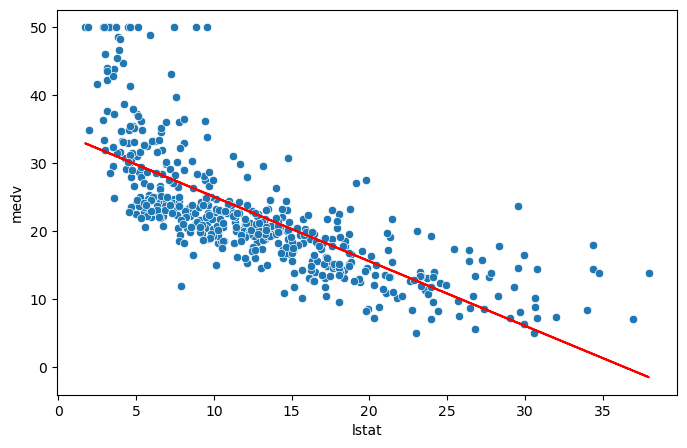

In [61]:
# BEGIN SOLUTION
sns.scatterplot(x='lstat', y='medv', data=boston)
plt.plot(boston["lstat"],  predictions, color = 'r');
# Yes, this matches with the one created using lmplot(...) above.
# END SOLUTION

## Multiple Linear Regression

In the previous sections, we learnt how to establish relationships between one independent explanatory variable and one response variable. However, with real-world problems, you will often want to use **multiple features** to model and predict a response variable. To do so, we will use multiple linear regression, which attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to the observed data. Formally, the model for multiple linear regression, given $p$ features is:

$$y_i = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + … + \theta_p x_p $$

Please note that we have been using the terms **features**, **independent variables**, and **explanatory variables** interchangeably. Usually “features” are used in the context of machine learning when you are trying to make predictions. “Independent variables” and “explanatory variables” are mainly found in statistics, econometrics and other related fields that focus on understanding the relationship between a set of variables.  

### Creating train and test data for validation 

Before we fit the regression model, let's split the boston dataset into `train` dataset (used to fit the model) and `test` dataset (to evaluate the model). 

There are several ways to proportionally split our data into train and test sets: 50/50, 60/40, 70/30, 80/20, and so forth. The data split that you select should be based on your experience and judgment. For this worksheet, I will use a 70/30 split. This approach is called the validation set approach (or data split). 

For this we are going to use `train_test_split` method from sklearn.model_selection, which separates predictors, response variables for train and test data.

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.drop(['medv'], axis=1), boston['medv'], test_size = 0.3, random_state = 101)

X_train.shape, X_test.shape

((354, 12), (152, 12))

### Question

<div class="alert alert-success">

a) Using scikit learn's `LinearRegression`, create and fit a model (name it `model_multiple`) that tries to predict `medv` from `lstat` AND `rm` from `train` dataset. 

b) Report the coefficients and intercept of the `model_multiple` regression model. 

c) Use the results from part b) to write out the function model equation to predict medv from lstat and rm.

d) Predict the median value of owner-occupied homes for new unseen data (i.e. `X_test` data). 

e) Report the $R^2$ using for the `model_multiple` regression model and compare it with $R^2$ for `model` regression model created above.

f) Create a residual plot of the residuals versus the fitted values for `model_multiple` regression model. Interpret the plot.
    
<div>

In [63]:
# Part a)
model_multiple = LinearRegression()
model_multiple.fit(X = X_train[['lstat', 'rm']], y= y_train) # SOLUTION

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [64]:
# Part b)
model_multiple.coef_, model_multiple.intercept_ # SOLUTION

(array([-0.67306116,  4.63603336]), np.float64(1.7704887137584784))

In [65]:
# Part c)

# BEGIN SOLUTION
# medv = 1.77  - 0.673 * lstat + 4.636 * rm 
# END SOLUTION

In [66]:
# Part d)
fitted_values= model_multiple.predict(X=X_test[['lstat', 'rm']]) # SOLUTION

In [67]:
# Part e)

# BEGIN SOLUTION

Rsq_multiple = model_multiple.score(X = X_train[['lstat', 'rm']], y= y_train)

# The R-square value of regression model created using `lstat` and `rm`
# is better than R-square value of regression model created using `lstat` only.
# Therefore adding more variables increases the predictive power of model.

# END SOLUTION

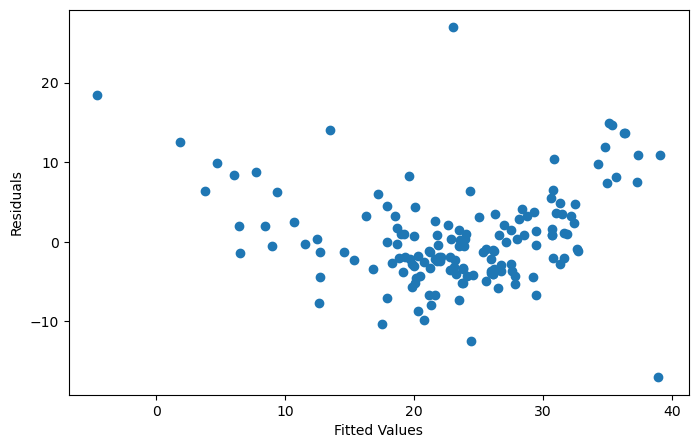

In [68]:
# Part f)

# BEGIN SOLUTION
plt.scatter(fitted_values, y_test - fitted_values)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals');

# This is not an example of a "good" residual plot. 
# There is an underlying parabolic pattern in the residuals, 
# so we may consider adding quadratic features in the model building.
# END SOLUTION